# End-to-End Multi-class Dog Breed Classification

This notebook builds and end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we're using is from Kaggle's dog breed itendification competition.

https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilitites for each dog breed of each image.

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* We're dealing with images (unstructured data - not in a dataframe) so it's probably best we use deep learning/transfer learning.
* There are 10,000+ images in the **trainig set** (this images has labels)
* There are around 10,000 in the **test tes** (this images has **No** labels, we will want to predict them)

In [ ]:
# unzip the uploaded data into google drive
#!unzip '/content/drive/MyDrive/ZTM/dog-vision/dog-breed-identification.zip' -d '/content/drive/MyDrive/ZTM/dog-vision/'

### Get our workspace ready

* Import TensorFlow 2.x
* Import Tensorflow Hub (this is where we are going to pick a model)
* Make sure we're using a GPU (make very fast numerical calculations)

In [ ]:
# import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print('TF version: ', tf.__version__)
print('TF Hub version: ',hub.__version__)

# check for GPU availability
print('GPU', 'Available (YES!!!!!!)' if tf.config.list_physical_devices('GPU') else 'not available:(')

TF version:  2.18.0
TF Hub version:  0.16.1
GPU not available:(


In [ ]:
import tf_keras as keras

## Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning Tensors(numerical representations).

Let's start by accesising our data and checking out the labels.

Video = Loading Our Data Labels

In [ ]:
Image('drive/MyDrive/ZTM/dog-vision/tensor-flow-work-flow.png')

NameError: name 'Image' is not defined

In [ ]:
# Check out the labels of our data
import pandas as pd
import matplotlib.pyplot as plt

labels_csv = pd.read_csv('drive/MyDrive/ZTM/dog-vision/labels.csv')
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: xlabel='breed'>

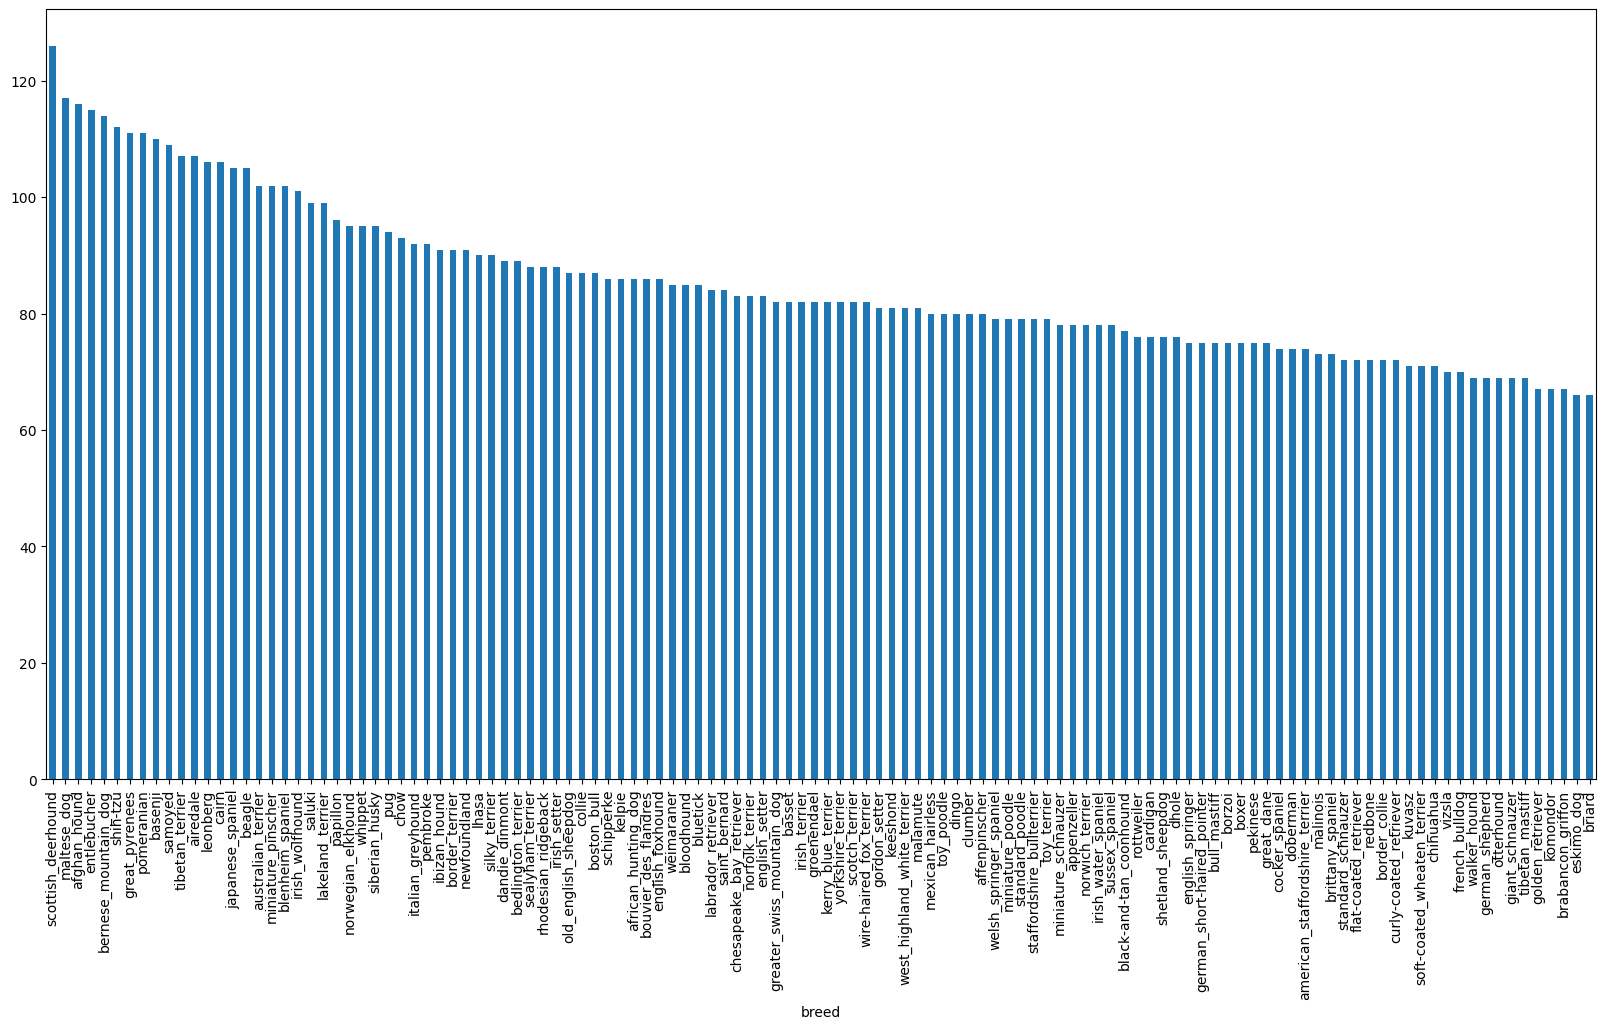

In [ ]:
# How many images are there of each breed?
labels_csv['breed'].value_counts().plot.bar(figsize = (20,10))

In [ ]:
labels_csv['breed'].value_counts().mean()

np.float64(85.18333333333334)

video = Preparing The Images

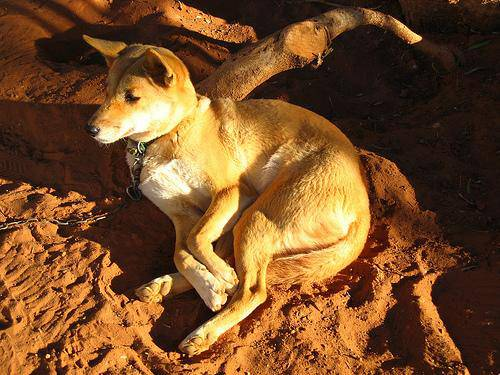

In [ ]:
# Let's view an image
from IPython.display import Image
Image('drive/MyDrive/ZTM/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

### Getting images and their labels

Let's get a list of all our image file pathnames

In [ ]:
labels_csv.head(10)

id               breed
0  000bec180eb18c7604dcecc8fe0dba07         boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97               dingo
2  001cdf01b096e06d78e9e5112d419397            pekinese
3  00214f311d5d2247d5dfe4fe24b2303d            bluetick
4  0021f9ceb3235effd7fcde7f7538ed62    golden_retriever
5  002211c81b498ef88e1b40b9abf84e1d  bedlington_terrier
6  00290d3e1fdd27226ba27a8ce248ce85  bedlington_terrier
7  002a283a315af96eaea0e28e7163b21b              borzoi
8  003df8b8a8b05244b1d920bb6cf451f9             basenji
9  0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound

In [ ]:
labels_csv.keys()

Index(['id', 'breed'], dtype='object')

In [ ]:
# create path names from image ID's
filenames = []
for fnames in labels_csv['id']:
  filenames.append(fnames)

filenames[:10]

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64']

In [ ]:
# you can also doin like this
# create path names from image ID's
filenames = [fnames for fnames in labels_csv['id']]

# check the first 10
filenames[:10]

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64']

In [ ]:
# Now we go to the forder
filenames = ['drive/MyDrive/ZTM/dog-vision/train/'+ fname + '.jpg' for fname in labels_csv['id']]

# check the first 10
filenames[:10]

['drive/MyDrive/ZTM/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# make sure you are working with the same amount of data
import os
if len(os.listdir('drive/MyDrive/ZTM/dog-vision/train/')) == len(filenames):
  print('Filenames match actual amount of files!!! Proceed.')
else:
  print('Filenames do not match actual amount of files. Check the target directory')

Filenames match actual amount of files!!! Proceed.


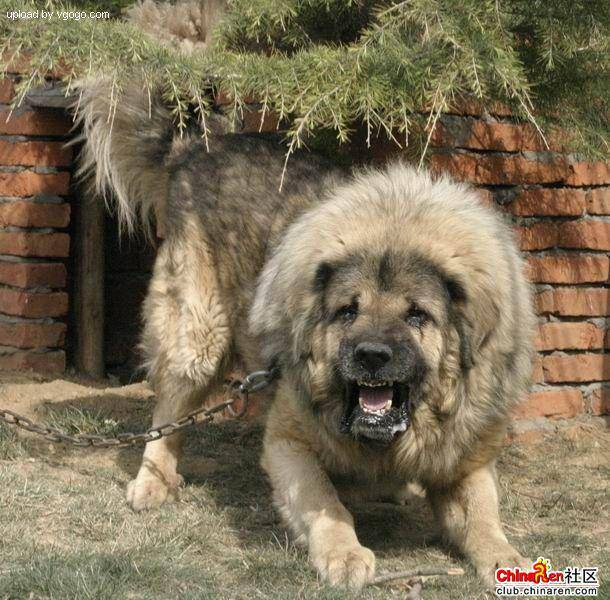

In [ ]:
# one more check
Image(filenames[9000])

In [ ]:
labels_csv['breed'][9000]

'tibetan_mastiff'

Since we've now got our training image filepaths in a list, let's prepare our labels

video = Turning Data Labels Into Numbers

In [ ]:
# we have to turn the labels into numbers
# we need to create a np.array
import numpy as np
labels = labels_csv['breed'].to_numpy()
# labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print('Number of labels matches number of filenames!')
else:
  print('Number of labels does not match of filenames, check data directories!')

Number of labels matches number of filenames!


In [ ]:
# since ML cannot take strings
# we have to convert the actual labels into numbers
# fin the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:1]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [ ]:
len(boolean_labels)

10222

In [ ]:
# how can we convert this boolean arrays into numbers
# example: turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in array
# argmax finds the indices of the maximum values along a specified axis in an array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
boolean_labels[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

### Creating our own validation set

Since the dataset from  Kaggle doesn't come with a validation set, we're going to create our own.

video = Creating Our Own Validation Set

In [ ]:
# Set up X and y variables
X = filenames
y = boolean_labels

we're going to start off experimenting with 1000 images and increase as needed

In [ ]:
# set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type: 'slider', min: 1000, max:10000, step: 1000}

In [ ]:
# let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into trainig and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size = 0.2,
                                                random_state = 42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# let's have a geez at the training data
X_train[:5], y_train[:2]

(['drive/MyDrive/ZTM/dog-vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/ZTM/dog-vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/ZTM/dog-vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/ZTM/dog-vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/ZTM/dog-vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, F

## Preprocess Images (turning images into tensors)

To preprocess our images into tensors we're going to write a function wich does a few things:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable 'image'
3. Turn our 'image' (a jpg) into tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1
5. Resize the 'image' to be a shape of (224, 224)
6. Return the modified 'image'

Before we do, let's see what importing an image looks like

video =  Preprocess Images

In [ ]:
# convert an image to a numpy array
from matplotlib.pyplot import imread # image read
image = imread(filenames[26])
image.shape


(500, 375, 3)

array([[[ 60,  69,  68],
        [ 65,  74,  73],
        [ 71,  80,  79],
        ...,
        [115, 128, 110],
        [115, 128, 110],
        [110, 123, 105]],

       [[ 65,  74,  73],
        [ 73,  82,  81],
        [ 79,  88,  87],
        ...,
        [114, 127, 109],
        [117, 130, 112],
        [116, 129, 111]],

       [[ 68,  77,  74],
        [ 77,  86,  83],
        [ 83,  92,  89],
        ...,
        [115, 128, 110],
        [121, 134, 116],
        [123, 136, 118]],

       ...,

       [[173, 200, 155],
        [167, 180, 137],
        [182, 167, 134],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[142, 159, 117],
        [147, 154, 113],
        [189, 174, 141],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[167, 179, 139],
        [167, 172, 132],
        [204, 188, 155],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
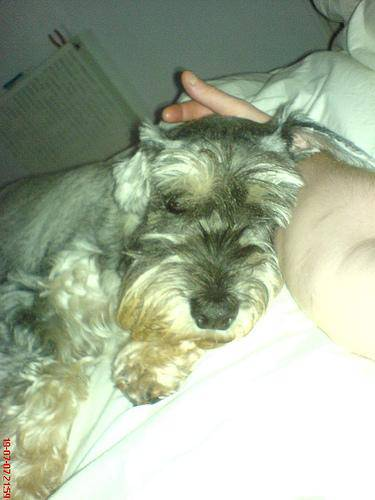

In [ ]:
# this are colors number
# each combination of a pixel is a combination of RGB
# and they reange from 0 to 255
image

In [ ]:
# max and min range of color
image.max(), image.min()

(np.uint8(255), np.uint8(0))

In [ ]:
# let's convert it into a tensor
# now this tensor is able to run on a GPU
# will find patterns a lot faster
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 375, 3), dtype=uint8, numpy=
array([[[ 60,  69,  68],
        [ 65,  74,  73],
        [ 71,  80,  79],
        ...,
        [115, 128, 110],
        [115, 128, 110],
        [110, 123, 105]],

       [[ 65,  74,  73],
        [ 73,  82,  81],
        [ 79,  88,  87],
        ...,
        [114, 127, 109],
        [117, 130, 112],
        [116, 129, 111]]], dtype=uint8)>

Now we've seen what an image looks like as a tensor. Let's make a function to preprocess them.

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable 'image'
3. Turn our 'image' (a jpg) into tensors
4. Resize the 'image' to be a shape of (224, 224)
5. Return the modified 'image'



Video = Preprocess Images 2

In [ ]:
# Define image size
IMG_SIZE = 224 # the model we are going to use must be related
# with the image size
# the model we are going to use was trained on 224 , 224

# Create a function for preprocessing images
def process_image(image_path, img_size = IMG_SIZE):
  """
  Takes an image file path and turn the image into Tensor.
  """
  # Read an image file
  image = tf.io.read_file(image_path) # returns a tensor of type string
  # turn the jpg image into numerical Tensor with 3 colour chanels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels = 3)
  # convert the color values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32) # now the values are between 0 and 1
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])
  return image

## Turning our data into batches

Why turn our data into batches?

Let's say you are trying to process 10,000+ images in one go...they all might not fit into memory. That's why we do about 32 images (batch sizes) at the time.

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples wich look like this:
´(image, label)´

1. we pass 32 of (image, label) to the ML model
2. Then it will figure out the patterns on the image that relate to the label

* tensorflow likes to see thing in data batches...we'll see that in the next part of the code
* also called a mini batch: small portion of your data (32)
* We are taking a small portion of images (32) and calculating on those 32 the first loop, and then the next loop

video = Turning Data Into Batches

In [ ]:
# first we need to get a tuple
# create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image path name and the assosciated label, processes the image and
  returns a tuple of (image, label)
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# this is a tuple (iamge, label)
# in the form of tensors
# this is what the function from above returns
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of tensors in the form: (image, label), let's make a function to turn all of our data (X & y) into batches

video = Turning Data Into Batches 2

In [ ]:
# Create test_data batches
# we need to first has data as tensor
tensor_X_train, tensor_X_val = tf.constant(X_train), tf.constant(X_val)
tensor_y_val, tensor_y_val = tf.constant(y_train), tf.constant(y_val)

#
data = tf.data.Dataset.from_tensor_slices((tensor_X_train, tensor_X_train))
data = data.shuffle(buffer_size = len(X))
data = data.map(get_image_label).batch(BATCH_SIZE)
data
data_batch = data.batch(BATCH_SIZE)
data_batch

NameError: name 'BATCH_SIZE' is not defined

In [ ]:
# define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but does not shuffle if it's validation data.
  Also accepts test data as input (no labels)
  """
  # If the data is a test data set we probably don't have labels
  if test_data:
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # pass me some tensor and I will create a DataSet out of data
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    # take the data and map to process_image and the turn it into a batch
    return data_batch
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print('Creating validation data Batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepath
                                              tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print('Creating training data batches...')
    # turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size = len(x))

    # create (image, label) tuple
    # this also turns the image path into a preprocessed image
    data = data.map(get_image_label) ##########

    # turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)

Creating training data batches...
Creating validation data Batches...


In [ ]:
# check out the different attributes of our data batche
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!

explore what is in our batch

video = Visualizing Our Data

In [ ]:
# we have our data in batches
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1) # rows, columns, index
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()]) # unique_breeds[y[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

In [ ]:
# remeber what unique breeds has
unique_breeds[:20]

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull'], dtype=object)

In [ ]:
# y[0] corresponde al valor Breed de la primera fila,
# true es el valor relacionado a la raza con unique breeds
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
y[0].argmax() # devuelve la posicion en la que está el breed


np.int64(19)

In [ ]:
# luego la va a buscar al DF
unique_breeds[y[0].argmax()]

'boston_bull'

In [ ]:
labels_csv[:1] # la primera fila de los datos

id        breed
0  000bec180eb18c7604dcecc8fe0dba07  boston_bull

In [ ]:
X[:1] # este perro es un boston_bull

['drive/MyDrive/ZTM/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg']

In [ ]:
# Our data in a batch and we need to unbatch it to visualize it
# train_images must be transform to numpy_iterator
# next will grab the first batch
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.9960919 , 0.9882488 , 0.99693763],
          [1.        , 0.99312854, 1.        ],
          [0.99928886, 0.993548  , 0.9913481 ],
          ...,
          [0.61337054, 0.64089954, 0.70341045],
          [0.6422653 , 0.6697163 , 0.70579815],
          [0.7412492 , 0.76870024, 0.7981295 ]],
 
         [[0.9897659 , 0.98775256, 0.95961004],
          [1.        , 0.99899334, 0.9791532 ],
          [1.        , 0.9999191 , 0.9664283 ],
          ...,
          [0.65650624, 0.6811232 , 0.73732734],
          [0.6438922 , 0.67470056, 0.6894231 ],
          [0.77195865, 0.80523944, 0.80836445]],
 
         [[0.989867  , 0.993437  , 0.91627634],
          [0.96557254, 0.9705729 , 0.8990022 ],
          [0.98874664, 0.9936048 , 0.9246097 ],
          ...,
          [0.7417697 , 0.75731415, 0.7983383 ],
          [0.6101093 , 0.6455456 , 0.63722754],
          [0.6864345 , 0.7220883 , 0.7050794 ]],
 
         ...,
 
         [[0.70101124, 0.68568456, 0.64234465],
          [0.65619

In [ ]:
# now we have a numpy array
type(train_data), type(train_images)

(tensorflow.python.data.ops.batch_op._BatchDataset, numpy.ndarray)

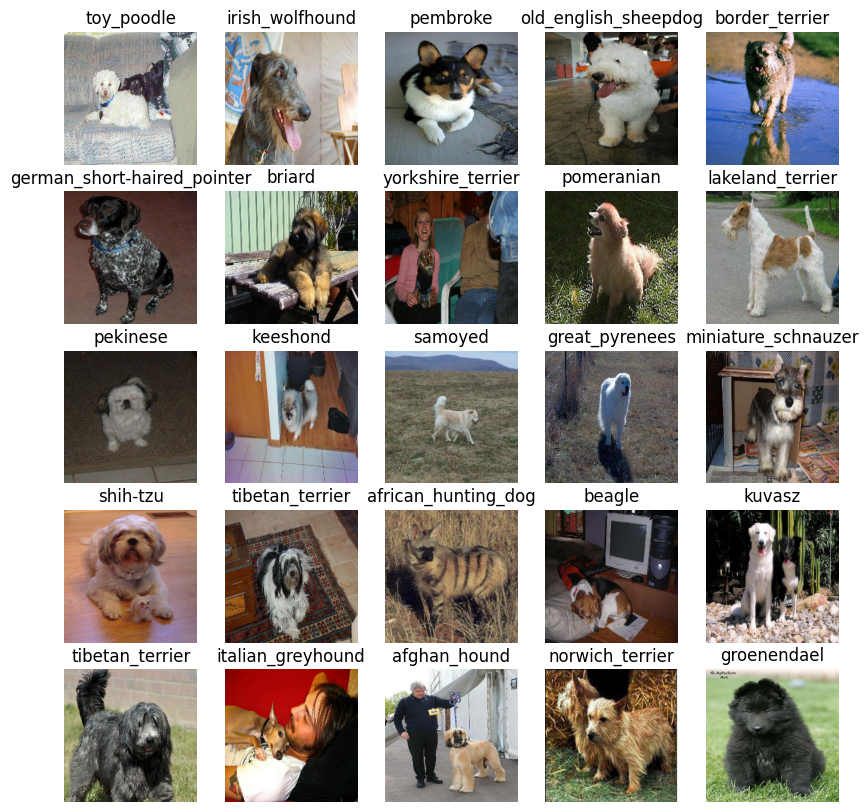

In [ ]:
# now let's visualize the data in a training batch
show_25_images(train_images, train_labels)

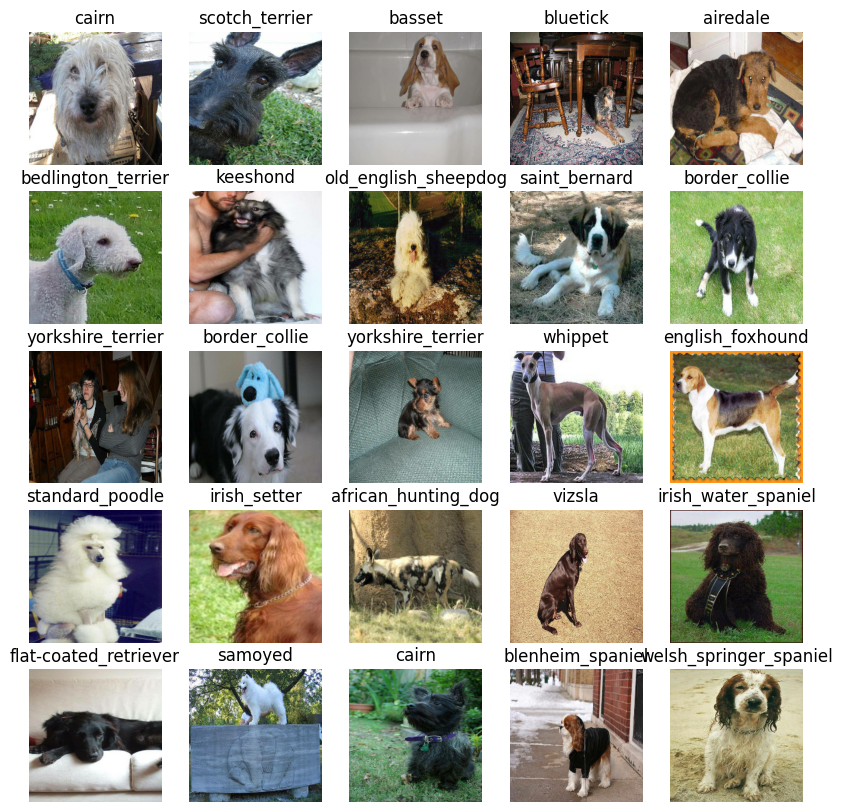

In [ ]:
# Now let's visualize our validation set
val_images, val_lebels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_lebels)

## Building a model

Before we build a model, there are a few things we need to define:
* The input shape(our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL the model we want to use from TensorFlow hub: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

video = Preparing Our Inputs and Outputs

video = Building A Deep Learning Model

In [ ]:
# Set up input shape to the model
# Forma que tendrán las imágenes al entrar al modelo
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch,hieght, width, colour channels [RGB]

# setup output shape of our model
# Cada salida del modelo corresponderá a la probabilidad
# de que una imagen pertenezca a una de esas 120 razas.
OUTPUT_SHAPE = len(unique_breeds)

# setup model URL from TensorFlow HUB
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

Imagina que estás enseñando a un niño a reconocer perros usando muchas fotos. Podrías hacerlo de dos maneras:

**Una foto a la vez:** Le muestras una foto, le preguntas qué raza es, y le das retroalimentación inmediatamente. Luego, pasas a la siguiente foto.

**Varias fotos a la vez (por lotes):** Le muestras un álbum con 10 fotos. El niño mira todas, adivina la raza de cada una, y luego tú le das retroalimentación para las 10 fotos al mismo tiempo.

**¿Qué es el "Batch Size"?**

En el aprendizaje profundo, el tamaño del batch (batch_size) se refiere al número de ejemplos de entrenamiento que se procesan juntos en una sola pasada a través de la red neuronal antes de que se actualicen los pesos del modelo.

Cuando el modelo está aprendiendo (entrenamiento): En lugar de alimentar una sola imagen a la red, alimentamos un grupo (un "batch") de, por ejemplo, 32 imágenes a la vez. El modelo hace predicciones para esas 32 imágenes, calcula el error promedio de ese batch, y luego ajusta sus pesos basándose en ese error.

**¿Por qué None en INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]?**

El None en la primera posición de INPUT_SHAPE es un marcador de posición especial que significa "cualquier tamaño de batch" o "tamaño de batch flexible".

Cuando defines el INPUT_SHAPE de esta manera (ej. [None, 224, 224, 3]), le estás diciendo a TensorFlow (o Keras) que el modelo está diseñado para aceptar lotes de imágenes de cualquier tamaño.
Esto es útil porque durante el entrenamiento, podrías querer experimentar con diferentes tamaños de batch (ej. 16, 32, 64 imágenes por lote). También, cuando uses el modelo para hacer predicciones en el futuro, podrías pasarle una sola imagen (batch de tamaño 1), o 5 imágenes, o 100 imágenes a la vez, sin tener que rediseñar el modelo.
En resumen, **None** permite que tu modelo sea flexible en cuanto a cuántas imágenes procesa simultáneamente, tanto durante el entrenamiento como en la fase de uso. Si en lugar de None hubieras puesto, por ejemplo, 32, el modelo solo aceptaría lotes de exactamente 32 imágenes.

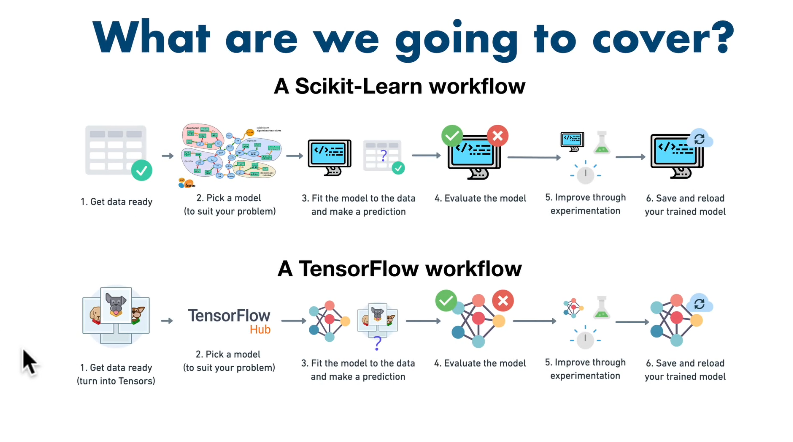

In [ ]:
Image('drive/MyDrive/ZTM/dog-vision/tensor-flow-work-flow.png')

Now we've got our inputs outputs and model ready to go.
Let's put them together into a Keras deep learning model!
Knwing this let's create a function wich:

* takes the input shape, output shape and the model we've chosen as parameters
* Defines the layers in Keras model in sequential fashion (do fisrt, then thin, then that)
* Compiles the model (says it should be evaluated and improve)
* Builds the model (tells the model the input shape it'll be gettin)
* Returns the model

All of this steps can be found here: https://www.tensorflow.org/guide/keras/overview

Video = Building A Deep Learning Model 2

In [ ]:
# create a function wich builds a kears model
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print('Building model with: ', MODEL_URL)

  # Setup the model layers
  model = keras.Sequential([
    hub.KerasLayer(MODEL_URL), # layer 1 (input layer)
    keras.layers.Dense(units = OUTPUT_SHAPE,
                          activation = 'softmax') # Layer 2 (output layer) capa de salida personlizada
  ])
  # dense es la última capa, con 120 neuronas, de ellas se escoge una
  # que es la mejor predicción segun SOFTMAX
  # Compile the model
  model.compile(
      loss = keras.losses.CategoricalCrossentropy(), # how well the model is guessing
      optimizer = keras.optimizers.Adam(), # ajustar los pesos
      metrics = ['accuracy'] # evaluate those guessings
  )

  # Build the mode
  model.build(INPUT_SHAPE) # construir el modelo con el shape dado

  return model

1. **def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL)**:

* Aquí estamos definiendo una función llamada create_model. Esto es una práctica común y muy útil en programación. Piensa en una función como una "receta" o un "mini-programa" que puedes llamar cuando lo necesites.

* Esta función toma tres argumentos (o "ingredientes" para nuestra receta): input_shape, output_shape y model_url. Estos argumentos son las constantes que definimos al principio del código, que nos indican el tamaño de las imágenes de entrada, cuántas razas distintas debe identificar el modelo, y la dirección del modelo pre-entrenado que vamos a usar.

2. **print('Building model with: ', MODEL_URL)**

* Esta línea es bastante sencilla. Solo imprime un mensaje en la consola para informarte qué modelo base se está utilizando. Es útil para depuración o simplemente para ver qué está haciendo el código.

3. **model = keras.Sequential([...])**

* Aquí es donde construimos la estructura de nuestra red neuronal.
* **keras.Sequential**: Es un tipo de modelo de Keras que se construye apilando capas una tras otra en secuencia. Imagina que estás construyendo una torre con bloques: pones un bloque, luego otro encima, y así sucesivamente. La salida de un bloque (una capa) se convierte en la entrada del siguiente. Es la forma más fácil y común de crear una red neuronal simple.

4. **hub.KerasLayer(MODEL_URL)**

* ¡Esta es la primera capa que añadimos a nuestra torre y es el corazón de nuestro modelo!

* **hub.KerasLayer** es una forma de integrar modelos pre-entrenados directamente desde TensorFlow Hub.

* Cuando pasamos MODEL_URL ('https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4') a hub.KerasLayer, estamos cargando el modelo MobileNetV2.

* **¿Qué significa esto? MobileNetV2** es una red neuronal convolucional (CNN) muy potente y eficiente que ya ha sido entrenada con un conjunto de datos enorme llamado ImageNet. ImageNet contiene millones de imágenes de 1000 categorías diferentes (no solo perros, sino de todo tipo de objetos, animales, etc.).

* Este modelo ya ha aprendido a reconocer características visuales básicas y complejas (bordes, texturas, formas, patrones de objetos). Al usarlo aquí, estamos aprovechando ese "conocimiento" ya adquirido. Es como si el modelo ya fuera un experto en "ver" y entender el mundo visual.

* Esta única línea **hub.KerasLayer(MODEL_URL)** contiene internamente muchísimas capas de la arquitectura MobileNetV2 (como mencionamos, unas 150-157 capas). Lo que hace TensorFlow Hub es encapsular toda esa complejidad para que puedas usarla como una sola "caja negra" en tu modelo.

* Por defecto, las capas de este modelo pre-entrenado suelen estar "congeladas" (no se entrenan), lo cual es ideal para el aprendizaje por transferencia (transfer learning): tomas un modelo que ya sabe mucho, y solo le enseñas lo nuevo (en tu caso, a diferenciar razas de perros específicas).
5. **keras.layers.Dense(units = OUTPUT_SHAPE, activation = 'softmax')**

* Esta es la segunda y última capa que agregamos a nuestra torre. Es la capa de salida de tu modelo.
* **keras.layers.Dense:** También conocida como una "capa totalmente conectada" (fully connected). Imagina que cada neurona en esta capa está conectada a cada una de las neuronas de la capa anterior (la salida de MobileNetV2). Es aquí donde el modelo toma todas las características visuales que MobileNetV2 extrajo y las combina para hacer una predicción final.

* **units = OUTPUT_SHAPE**: El número de neuronas en esta capa es igual a OUTPUT_SHAPE. Como OUTPUT_SHAPE es el número de razas de perros únicas que tienes (len(unique_breeds)), esta capa tendrá una neurona por cada raza. Si tienes 120 razas, esta capa tendrá 120 neuronas.

* **activation = 'softmax':** La función de activación softmax se usa típicamente en la capa de salida de problemas de clasificación con múltiples clases. Lo que hace es convertir los números de salida de las neuronas en probabilidades. La suma de todas las probabilidades será 1. Por ejemplo, si tienes 120 razas, la salida podría ser [0.01, 0.005, ..., 0.92, ..., 0.001], indicando que hay un 92% de probabilidad de que la imagen sea de la raza número X.

En resumen, tu modelo es un "sándwich" de dos capas principales: el enorme y ya entrenado MobileNetV2 (que extrae características de la imagen) y una pequeña capa densa personalizada que toma esas características y las convierte en una predicción de probabilidad para cada raza de perro.

**loss = keras.losses.CategoricalCrossentropy():**

La función de pérdida (loss function) es una métrica que el modelo intenta minimizar durante el entrenamiento. Mide qué tan lejos están las predicciones del modelo de los valores reales. Un valor de pérdida más bajo significa que el modelo está haciendo mejores predicciones.

**CategoricalCrossentropy** es una función de pérdida muy común para problemas de clasificación multiclase donde las etiquetas (las razas de perros en tu caso) están codificadas en formato one-hot (por ejemplo, si tienes 3 razas, una imagen de Labrador sería [0, 1, 0], no solo el número 1). Calcula la distancia entre la distribución de probabilidad predicha por tu modelo y la distribución de probabilidad verdadera.

video = Summarizing Our Model

In [ ]:
model = create_model()
model.summary()
# utiliza 5,432,713 parámetros para encontrar patrones en las fotografías
# luego obtiene 1001 parámetros importantes los cuales deben ser entrenados con
# 120 razas de perros

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


**dense (Dense):** Esto indica el nombre de la capa (a menudo Keras le asigna dense o dense_1, dense_2, etc.) y el tipo de capa, que es Dense (una capa totalmente conectada).

**Output Shape:** (None, 120): ¡Esta es la clave!

1. **None:** Como ya sabes, esto se refiere al tamaño del batch flexible. Significa que la capa puede procesar cualquier número de imágenes a la vez. Si le pasas un batch de 32 imágenes, la forma de salida real para ese batch será (32, 120). Si le pasas una sola imagen, será (1, 120).

2. **120:** Este es el número de unidades (neuronas) en tu capa Dense. Y como esta es la capa de salida con activation='softmax', cada una de estas 120 unidades corresponderá a una de las 120 razas de perros únicas que tu modelo está intentando clasificar. Cada valor en esta salida de 120 elementos será una probabilidad.

Por ejemplo, si la salida para una imagen es [0.001, ..., 0.95, ..., 0.002], el 0.95 indicaría que hay un 95% de probabilidad de que la imagen pertenezca a la raza de perro número (o índice) X en tu lista de razas.

**Param #:** Este número (5432713) representa la cantidad total de parámetros (pesos y sesgos) que esta capa Dense específica tiene que aprender durante el entrenamiento. Estos parámetros son los que la capa ajusta para transformar las características que vienen del modelo MobileNetV2 en las probabilidades de las razas.

**En resumen:** Sí, el 120 en la forma de salida de la capa dense significa que tu modelo está configurado para producir un vector de 120 valores (probabilidades) por cada imagen de entrada, donde cada uno de esos 120 valores representa la probabilidad de que la imagen pertenezca a una de las 120 razas de perros.

1. **MobileNetV2 (5,432,713 parámetros)**: Este modelo pre-entrenado ya ha "aprendido" a extraer características generales y muy útiles de millones de imágenes (de ImageNet). Los 5,432,713 parámetros son el resultado de ese vasto entrenamiento previo. Cuando lo incluyes en tu modelo con hub.KerasLayer, por defecto, esos parámetros están "congelados" (non-trainable). Esto significa que no se modificarán durante el entrenamiento de tu modelo de razas de perros. Su función es actuar como un extractor de características potente y ya optimizado. Es como si ya fuera un "experto en ver imágenes".

2. **Tu capa Dense (120,240 parámetros):** Esta es la parte de tu modelo que sí es "entrenable" (trainable). Sus 120,240 parámetros son los que tu modelo va a ajustar y aprender desde cero para tu tarea específica: clasificar las razas de perros. Esta capa toma las características de alto nivel que MobileNetV2 ha extraído de una imagen y aprende a mapearlas a las 120 razas específicas que tienes.



**Cómo Funciona el Flujo de Parámetros en tu Modelo**
**2,257,984 parámetros de MobileNetV2 (Congelados):**
MobileNetV2 utiliza estos millones de parámetros, que ya fueron ajustados con el entrenamiento en ImageNet, para encontrar y extraer patrones y características de alto nivel de cualquier imagen que le presentes, incluyendo las fotos de perros. Piensa en ellos como la "inteligencia visual" preexistente del modelo. Son expertos en reconocer bordes, texturas, formas, y estructuras complejas (como la forma general de un animal, la estructura de una cara, etc.). Dado que están congelados, no se modifican durante tu entrenamiento.

**1280 características (La Salida de MobileNetV2):**
Una vez que MobileNetV2 ha procesado una imagen usando esos 2.2 millones de parámetros, no te da una clasificación de "perro" o "gato", sino que te entrega un vector de 1280 números. Cada uno de estos números es una "característica" abstracta que MobileNetV2 considera importante en la imagen. Es el "resumen" de lo que MobileNetV2 ha "visto" en la imagen, expresado en 1280 dimensiones.

**153,720 parámetros de la capa Dense (Entrenables):**
Estos son los parámetros de tu capa Dense que sí se entrenan. Su trabajo es tomar esos 1280 "resúmenes" o características que vienen de MobileNetV2 y aprender a mapearlos específicamente a tus 120 razas de perros. La capa Dense aprende qué combinación de esos 1280 valores indica que la imagen es un Labrador, cuál un Golden Retriever, y así sucesivamente.

## Creating callbacks

Callblacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stop improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

We'll create two callbacks, one for TensorBroad wich helps track our models progress and another for early stopping wich prevents our model fro training too long.

### TensorBoard CallBacks

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback wich is able to save logs
to a directory and pass it to our model's 'fit()' function.
3. Visualize our models training logs with the '%tensorboar' magic function. (We'll do this after model training)

video = Evaluating Our Model

In [ ]:
# Load TensorBoard Notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # create a log directory for storing TensorBoard logs
  logdir = os.path.join('drive/MyDrive/ZTM/dog-vision/logs',
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
                        )
  return keras.callbacks.TensorBoard(logdir)

### Early stopping call ack

Early stopping helps stops our model from overfitting by stopping training if a certain evaluation metric stops imrpoving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

video = Preventing Overfitting

In [ ]:
# create early stopping call bakc
early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                               patience = 3)

## Training a model (on subset of data)

Our first model is only going to train 1000 images, to make sure everything is working.

video = Training Your Deep Neural Network

In [ ]:
NUM_EPOCHS = 100 #@param {type: 'slider', min:10, max:100, step:10}

In [ ]:
# check to make sure we're still running on a GPU
print('GPU', 'available (YESSS!!!)' if tf.config.list_physical_devices('GPU') else 'not available:(')

GPU not available:(


let's create a function wich trains a model

* Create amodel using 'create_model()'
* Setup TensorBoard callback using 'create_tensorboard_callback()'
* Call the 'fit()' function on our model passing it the training data, validation data, number of epochs to train from (NUM_EPOCHS) and the callbakcs we'd like to use.
* Return the model

In [ ]:
# build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x = train_data,# data batch wich contains images, labels
            epochs = NUM_EPOCHS,# how many times is the model allowed to look the training set to find patterns
            validation_data = val_data,# data Batch
            validation_freq = 1,# how many times we want to test the patterns we found on our val_data
            callbacks = [tensorboard, early_stopping])

  # return model fitted
  return model

In [ ]:
# Fit he model to the data
model = train_model()
# 800/32 = 25, steps = 200/32 = 6.5

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 448s 16s/step - loss: 4.4849 - accuracy: 0.1112 - val_loss: 3.4295 - val_accuracy: 0.3100
Epoch 2/100
25/25 [==============================] - 49s 2s/step - loss: 1.5885 - accuracy: 0.7025 - val_loss: 2.1919 - val_accuracy: 0.5200
Epoch 3/100
25/25 [==============================] - 49s 2s/step - loss: 0.5522 - accuracy: 0.9375 - val_loss: 1.6976 - val_accuracy: 0.5800
Epoch 4/100
25/25 [==============================] - 49s 2s/step - loss: 0.2460 - accuracy: 0.9850 - val_loss: 1.5146 - val_accuracy: 0.6050
Epoch 5/100
25/25 [==============================] - 58s 2s/step - loss: 0.1460 - accuracy: 0.9962 - val_loss: 1.4562 - val_accuracy: 0.6000
Epoch 6/100
25/25 [==============================] - 62s 2s/step - loss: 0.0991 - accuracy: 0.9987 - val_loss: 1.4043 - val_accuracy: 0.6100
Epoch 7/100
25/25 [==============================] - 67s 3

**Question:** it looks our model is overfitting because it's performing far better on the training dataset than the validation data set, what are some ways to prevent model overfitting in deep learning neural networks?

**Note:** Overfitting to begin with is a good things, it means our model is learning

### Checking the TensorBoard logs

The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and visualize it's content.

Video = Evaluating Performance With TensorBoard

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/ZTM/dog-vision/logs/

One line is pfor training and the other for validations set.
Our ML model is overfitted because it is learning the patterns from the training data far too well.

We need to stop overfitting. For example by using more data.

## Making and evaluating predictions using a trained model

video = Make And Transform Predictions

In [ ]:
# It is same as scikit-learn
# Make predictions on the validation data (this is not used to train on)
predictions = model.predict(val_data, verbose = 1)
# verbose is the progress bar (7/7 [==============================] - 4s 232ms/step)
predictions

7/7 [==============================] - 12s 2s/step


array([[1.2018943e-04, 1.2591443e-04, 7.3457148e-04, ..., 7.4650372e-05,
        5.1824245e-06, 4.0189349e-03],
       [3.4272971e-03, 1.2685366e-04, 3.2468453e-02, ..., 5.7488104e-04,
        9.0510893e-04, 3.2609628e-04],
       [2.8265677e-05, 1.8467050e-05, 9.4239498e-05, ..., 8.0699501e-06,
        6.8137429e-06, 2.1597347e-04],
       ...,
       [1.9876647e-06, 4.4289045e-05, 4.2506958e-06, ..., 8.3947623e-07,
        9.5906231e-05, 5.2749078e-06],
       [2.2721628e-03, 1.2307454e-04, 8.0914331e-05, ..., 7.5340155e-05,
        4.9451799e-05, 4.4342959e-03],
       [2.8877420e-04, 3.9808467e-05, 1.7806659e-02, ..., 6.1117909e-03,
        6.3102396e-04, 2.7737251e-05]], dtype=float32)

In [ ]:
predictions.shape
# 2 hundred images, 120 breed
# this is an asociated probability to what our model thinks of a picture

(200, 120)

In [ ]:
predictions

array([[1.2018943e-04, 1.2591443e-04, 7.3457148e-04, ..., 7.4650372e-05,
        5.1824245e-06, 4.0189349e-03],
       [3.4272971e-03, 1.2685366e-04, 3.2468453e-02, ..., 5.7488104e-04,
        9.0510893e-04, 3.2609628e-04],
       [2.8265677e-05, 1.8467050e-05, 9.4239498e-05, ..., 8.0699501e-06,
        6.8137429e-06, 2.1597347e-04],
       ...,
       [1.9876647e-06, 4.4289045e-05, 4.2506958e-06, ..., 8.3947623e-07,
        9.5906231e-05, 5.2749078e-06],
       [2.2721628e-03, 1.2307454e-04, 8.0914331e-05, ..., 7.5340155e-05,
        4.9451799e-05, 4.4342959e-03],
       [2.8877420e-04, 3.9808467e-05, 1.7806659e-02, ..., 6.1117909e-03,
        6.3102396e-04, 2.7737251e-05]], dtype=float32)

In [ ]:
# the highest value in here is going to correspond to the index of the label that
# the model thinks it is most likely
predictions[0] # prediction for val_data[0]

array([1.20189427e-04, 1.25914434e-04, 7.34571484e-04, 9.99786280e-05,
       5.14150379e-05, 1.22923220e-05, 9.61016957e-03, 6.54016854e-04,
       2.90668046e-04, 2.12508079e-04, 5.19633395e-05, 3.79335863e-04,
       9.64811989e-05, 1.02170896e-04, 9.40173923e-04, 1.40126256e-04,
       3.72941395e-05, 2.78004497e-01, 4.77086451e-06, 2.53689032e-05,
       3.07586044e-04, 2.09742557e-05, 3.50905793e-05, 1.40702608e-03,
       3.11665281e-06, 5.82789871e-05, 3.43423009e-01, 6.10802890e-05,
       1.10079018e-04, 1.07965134e-04, 6.05631249e-05, 3.67193279e-04,
       7.30043903e-05, 5.39988614e-05, 6.06070353e-05, 2.05341890e-03,
       1.84100027e-05, 1.02887316e-04, 1.15874311e-04, 8.89587973e-05,
       2.82352674e-03, 5.37523920e-05, 2.63292695e-05, 1.11298978e-04,
       9.33592528e-05, 9.84188446e-05, 3.70923517e-05, 3.81265891e-05,
       2.65093404e-04, 2.29557318e-05, 9.11054885e-05, 6.93550901e-05,
       7.24630721e-04, 1.06402855e-04, 5.63327776e-05, 9.73903389e-06,
      

In [ ]:
np.max(predictions[0])

np.float32(0.343423)

In [ ]:
# first prediction
index = 0
predictions[index]
print(f'Max Value (probability of prediction): {np.max(predictions[index])}')
print(f'Sum: {np.sum(predictions[index])}')
print(f'Max index: {np.argmax(predictions[index])}')
print(f'Prediction label: {unique_breeds[np.argmax(predictions[index])]}')

Max Value (probability of prediction): 0.3434230089187622
Sum: 1.0000001192092896
Max index: 26
Prediction label: cairn


In [ ]:
unique_breeds[0]

'affenpinscher'

Having the above functionality is great but we want to be able to do it a scale.

And it would be even better if we could see the image the prediction is being made on.

**Note:** prediction probabilities as also known as confidence levels

Video = Transform Predictions To Text

In [ ]:
# turn prediction probabilities into their respective label
def get_pred_label(prediction_probabilities):
  """
  Turns an array of predictions probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'cairn'

Now since our validation data is still in a batch data set (it's more efficient for tensorflow to make calculations), we'll have to unbatchify it to make predictions on the validation labels (truth labels).

* we need to get our val_data into a list because it is batched

* we need to unbatched it


In [ ]:
images_ = []
labels_ = []

# loop through unbatched data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

In [ ]:
labels_[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# create a function to unbatch a dataset
def unbatchify(data):
  """
  Takes a batch dataset of (image, label) Tensors and returns separate arrays
  of images and labels
  """
  images = []
  labels = []

  # Loop through
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
# what the actual value is
get_pred_label(val_labels[0])

'affenpinscher'

In [ ]:
# what the model predicted
get_pred_label(predictions[0])

'cairn'

Now we have got ways to get:

* Prediction labels
* Validation labels (truth labels)
* Validation Images

Let's make some function to make these all a bit more visualize.

We'll create a function wich:

* Takes an array of prediction probabilities, an array of truth labels and an array of images and integer.

* Convert the prediction probabilities to a predicted label.

* Plot the predicted label, it's predicted probability, the truth label and the target image on a single plot.

video = Visualizing Model Predictions

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n = 1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # get the pred label
  pred_label = get_pred_label(pred_prob)

  # plot iamge & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # change the color of the tittle depending on fi the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title('{} {:2.0f}% {}'.format(pred_label,
                                    np.max(pred_prob) *  100,
                                    true_label), color = color)

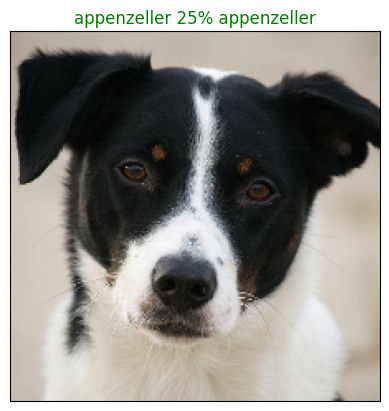

In [ ]:
plot_pred(prediction_probabilities = predictions,
          labels=val_labels,
          images = val_images,
          n = 199)

Now we have got one function to visualize our models top prediction, let's make another to view our models top 10 predictions:

* Take an input of prediction probabilities array and a groud truth array and an integer
* find the predictions using 'get_pred_label()'
* Find the top 10:
  * Prediction probabilities indexes
  * prediction probabilities values
  prediction labels

* Plot the top 10 predictions probability values and labels, coloring the true label green

video = Visualizing And Evaluate Model Predictions 2

In [ ]:
# Find the top 10 indexes
# we have the first prediction
# that needs to be sorted
predictions[0]

array([1.20189427e-04, 1.25914434e-04, 7.34571484e-04, 9.99786280e-05,
       5.14150379e-05, 1.22923220e-05, 9.61016957e-03, 6.54016854e-04,
       2.90668046e-04, 2.12508079e-04, 5.19633395e-05, 3.79335863e-04,
       9.64811989e-05, 1.02170896e-04, 9.40173923e-04, 1.40126256e-04,
       3.72941395e-05, 2.78004497e-01, 4.77086451e-06, 2.53689032e-05,
       3.07586044e-04, 2.09742557e-05, 3.50905793e-05, 1.40702608e-03,
       3.11665281e-06, 5.82789871e-05, 3.43423009e-01, 6.10802890e-05,
       1.10079018e-04, 1.07965134e-04, 6.05631249e-05, 3.67193279e-04,
       7.30043903e-05, 5.39988614e-05, 6.06070353e-05, 2.05341890e-03,
       1.84100027e-05, 1.02887316e-04, 1.15874311e-04, 8.89587973e-05,
       2.82352674e-03, 5.37523920e-05, 2.63292695e-05, 1.11298978e-04,
       9.33592528e-05, 9.84188446e-05, 3.70923517e-05, 3.81265891e-05,
       2.65093404e-04, 2.29557318e-05, 9.11054885e-05, 6.93550901e-05,
       7.24630721e-04, 1.06402855e-04, 5.63327776e-05, 9.73903389e-06,
      

In [ ]:
# order of idexes tha will sort this array
predictions[0].argsort()

array([ 24,  63,  18, 118, 115,  55,  92,  86,   5,  36,  84,  21,  75,
        49,  69,  19,  42,  94,  61,  72,  22,  60,  99,  46,  16, 101,
        47, 114,   4,  10, 112,  41,  33,  54,  25,  82,  30,  34,  27,
       104,  51,  78,  32, 117,  39,  50,  66,  44,  88,  12,  45,   3,
        13,  37,  53,  29,  28,  67,  43,  80,  38,  58,   0, 108,  95,
         1, 110,  15, 113,  89,  56, 107,  64, 105,   9,  48,  91, 111,
         8,  20,  31,  98,  11,  62,  96,  85,  71,   7,  52,   2,  74,
        97,  14,  90,  87,  93,  23,  77,  35,  81, 116,  40,  79, 106,
       119, 100,  57,  76,  68,  83,   6,  65,  70,  73, 103, 109, 102,
        59,  17,  26])

In [ ]:
# negative ten cause we want the top 10
predictions[0].argsort()[-10:][::-1]

array([ 26,  17,  59, 102, 109, 103,  73,  70,  65,   6])

In [ ]:
# top ten indexes
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.343423  , 0.2780045 , 0.1555392 , 0.04135777, 0.0256161 ,
       0.02442444, 0.02247167, 0.01941957, 0.01252625, 0.00961017],
      dtype=float32)

In [ ]:
# the best index from prediction 0
predictions[0][17]

np.float32(0.2780045)

In [ ]:
# top 10 labels from the prediction 0
unique_breeds[predictions[0].argsort()[-10:][::-1]]

array(['cairn', 'border_terrier', 'irish_wolfhound', 'silky_terrier',
       'tibetan_terrier', 'soft-coated_wheaten_terrier', 'maltese_dog',
       'lhasa', 'komondor', 'australian_terrier'], dtype=object)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n = 1):
  """
  Plus the top 10 highest prediction confidences along with the truth label fro sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # get the predicted label
  pred_label = get_pred_label(pred_prob)

  # find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1] # orden descendente

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # find the top 10
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # set up plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), # the arenge is from 10 bars
                     top_10_pred_values,
                     color = 'grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = 'vertical')

  # change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass

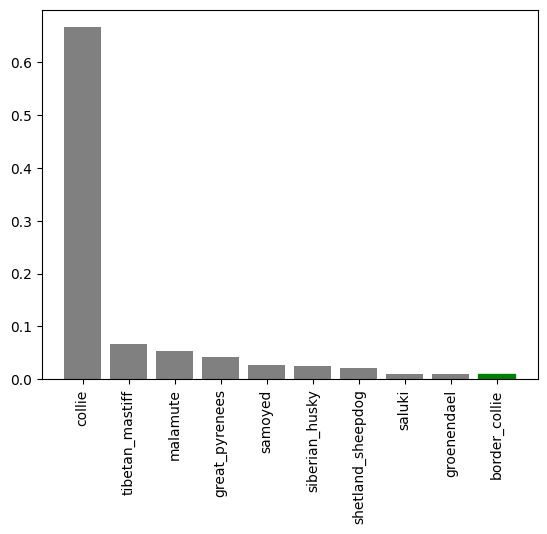

In [ ]:
plot_pred_conf(prediction_probabilities = predictions,
               labels = val_labels,
               n = 9)

Now we have got some function to help us visualize and evaluate our model, let's check out a few.

video = Visualizing And Evaluate Model Predictions 3

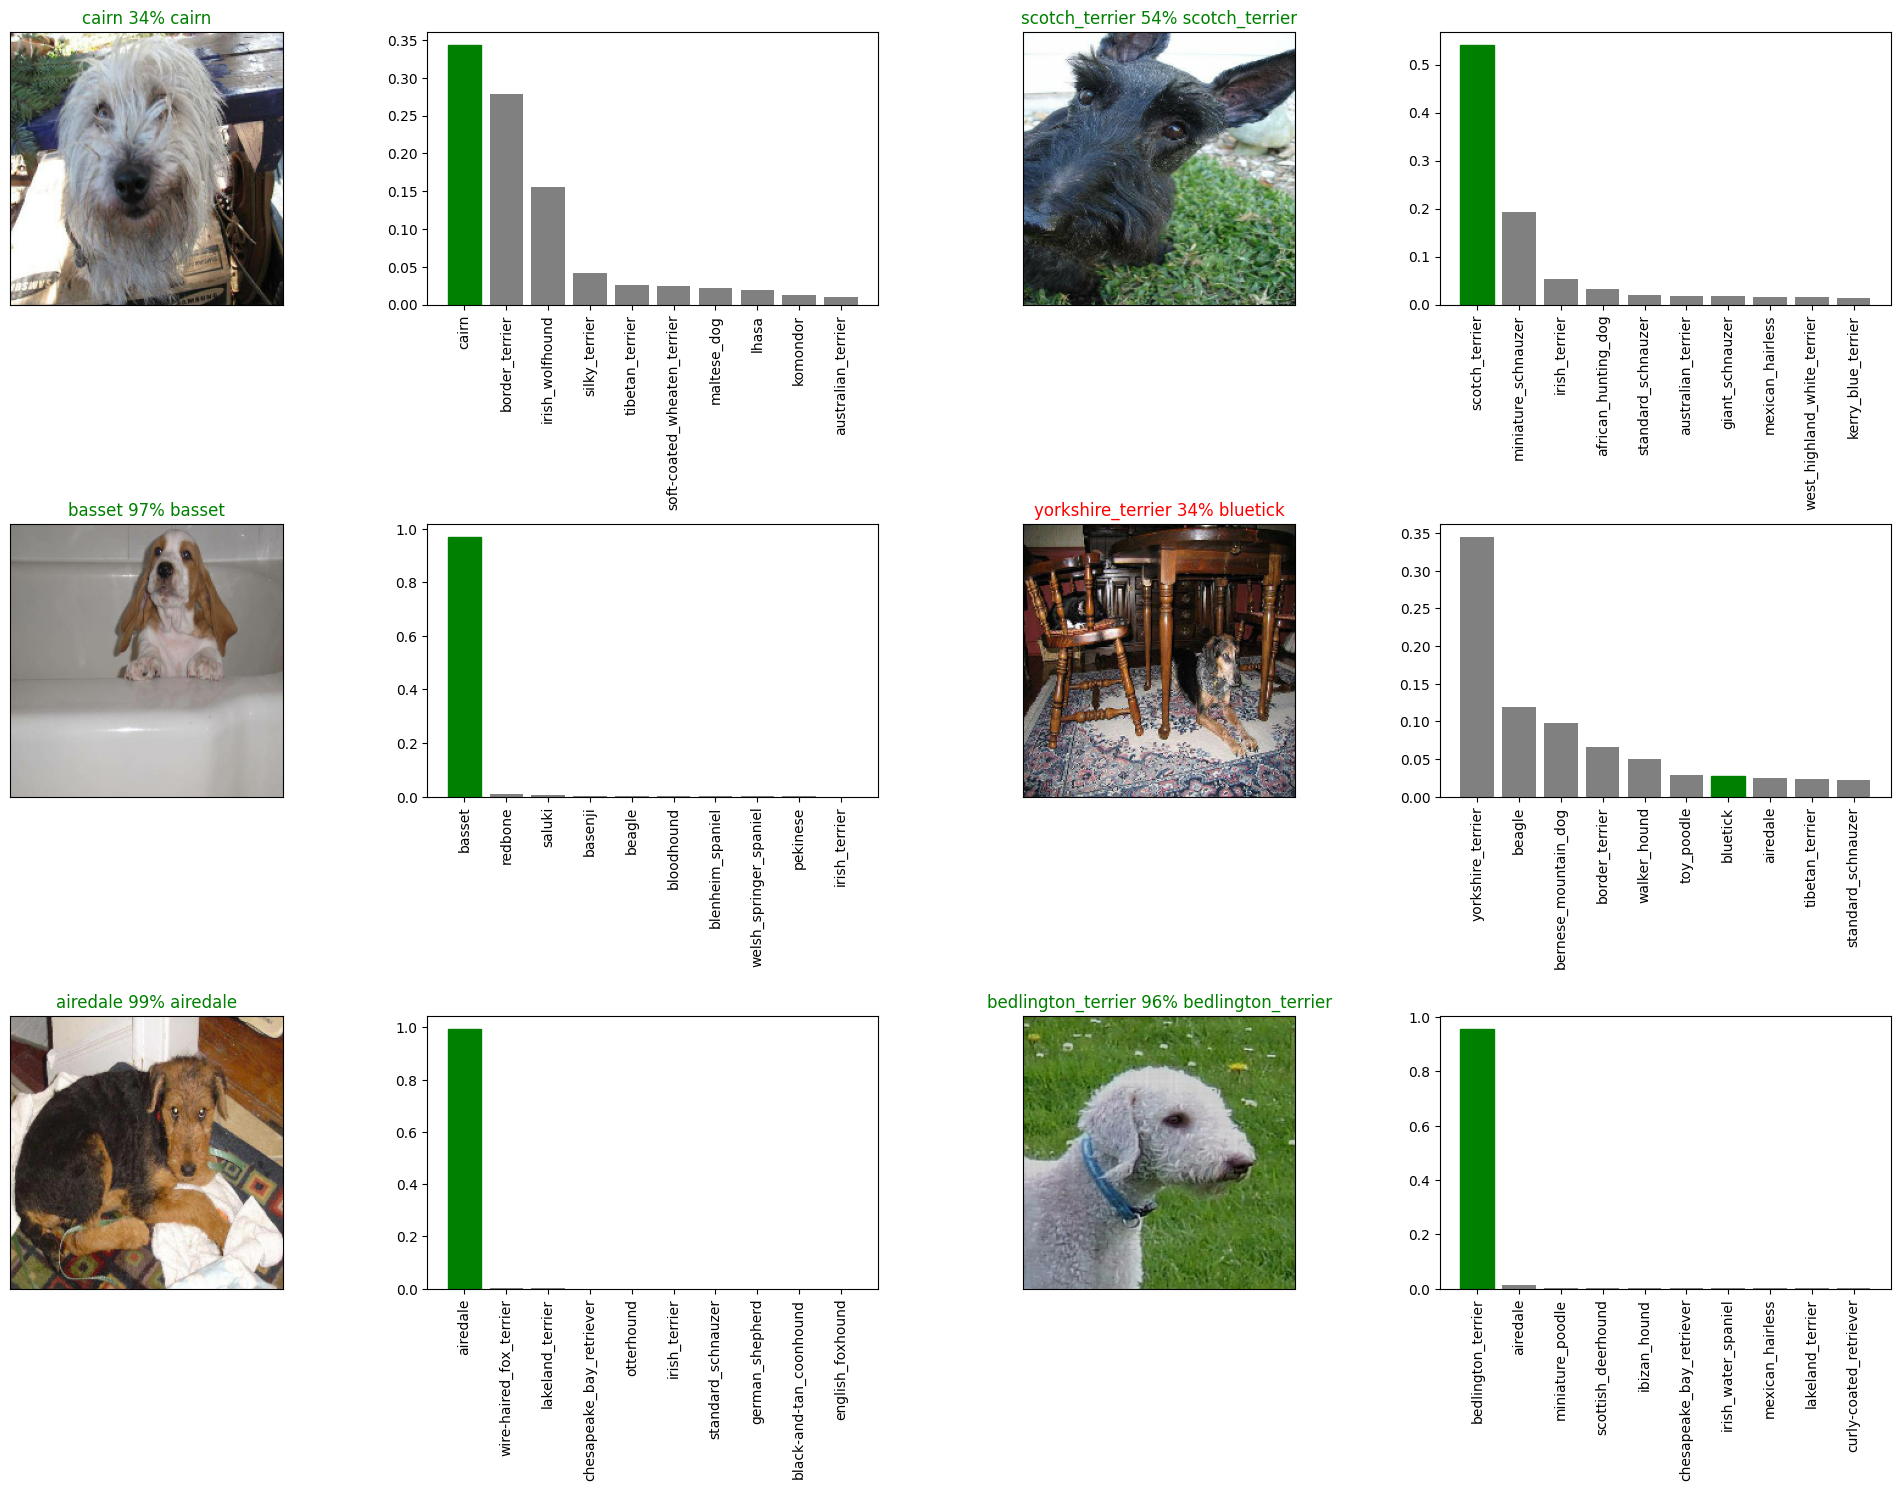

In [ ]:
# let's check out a few predictions and their different values
i_multiplier = 0 # number of images
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize = (10 * num_cols, 5 * num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_pred(prediction_probabilities = predictions,
              labels = val_labels,
              images = val_images,
              n = i +  i_multiplier)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_pred_conf(prediction_probabilities = predictions,
                 labels = val_labels,
                  n = i + i_multiplier)
plt.tight_layout(h_pad = 1.0)
plt.show()

## Saving and reloading a trained model

video = Saving And Loading A Trained Model

In [ ]:
# create a function to save a model
def save_model(model, suffix = None):
  """
  Saves a given model in a models directory and appends a suffic (string).
  """
  # let's create a model directory with current tima
  modeldir = os.path.join('drive/MyDrive/ZTM/dog-vision/models',
                          datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
  model_path = modeldir + '_' + suffix + '.h5' # save format
  print(f'Saving model to: {model_path}...')
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a train model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f'Loading saved model from: {model_path}')
  model = keras.models.load_model(model_path,
                                  custom_objects = {'KerasLayer': hub.KerasLayer})
  return model

Noe we have got functions to save and load a trained model, let's make sure it's work

In [ ]:
# save our model trained on 1000 images
save_model(model, suffix = '1000-images-mobilenetv2-Adam')

Saving model to: drive/MyDrive/ZTM/dog-vision/models/20250525-20521748206349_1000-images-mobilenetv2-Adam.h5...


/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/ZTM/dog-vision/models/20250525-20521748206349_1000-images-mobilenetv2-Adam.h5'

In [ ]:
# load a trained model
loaded_1000_image_model = load_model('drive/MyDrive/ZTM/dog-vision/models/20250525-20521748206349_1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/MyDrive/ZTM/dog-vision/models/20250525-20521748206349_1000-images-mobilenetv2-Adam.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 11s 2s/step - loss: 1.2579 - accuracy: 0.6400


[1.257899284362793, 0.6399999856948853]

In [ ]:
# evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 12s 2s/step - loss: 1.1898 - accuracy: 0.7100


[1.1897578239440918, 0.7099999785423279]

## Training a model (on the full data)

In [ ]:
# remeber what we had
len(X), len(y)

(10222, 10222)

In [ ]:
# dog images
X[:10]

['drive/MyDrive/ZTM/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/ZTM/dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# then we splitted in train and valid data (1000 samples)
len(X_train), len(y_val)

(800, 200)

In [ ]:
# create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
# now is a batch
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# create a model for full model
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# create full model callbacks
full_model_tensorboard = create_tensorboard_callback()

# no validation set when training on all the data
# se can not monitor validation accuracy
full_model_early_stopping = keras.callbacks.EarlyStopping(monitor = 'accuracy',
                                                           patience = 3)

**Note**: Running the cell below will take a little while (up to 30 minutes probably).

GPU has to load all of the images into memory.

That's why we decided to not work with all the data at the biggining. Because it takes a lot of time, and you could have errors

In [ ]:
# fit the full model to the full data
#full_model.fit(x = full_data,
#               epochs = NUM_EPOCHS,
#               callbacks = [full_model_tensorboard, full_model_early_stopping])

In [ ]:
# save the model
save_model(full_model, suffix = 'full-image-set-mobilenetv2-Adam')

In [ ]:
# load in the full model
loaded_full_model = load_model('drive/MyDrive/ZTM/dog-vision/models/full-image-set-mobilenetv2-Adam.h5')

## Making predictions on the test data set

We need to convert the test on numbers, in the form of tensor batches wich is the way we trained our model.

Luckily we created 'create_data_batches()' earlier wich can take a list of filenams as input and conver them into Tensor batches

To make predictions on the test data, we'll:
* Get the test image filename
* Convert the filenames into test data batches using create_data_batches() and setting the 'test_data' paramter to True (since the test data does not have labels)
* Make predictions array by passing the batches to the predict() method called on our model

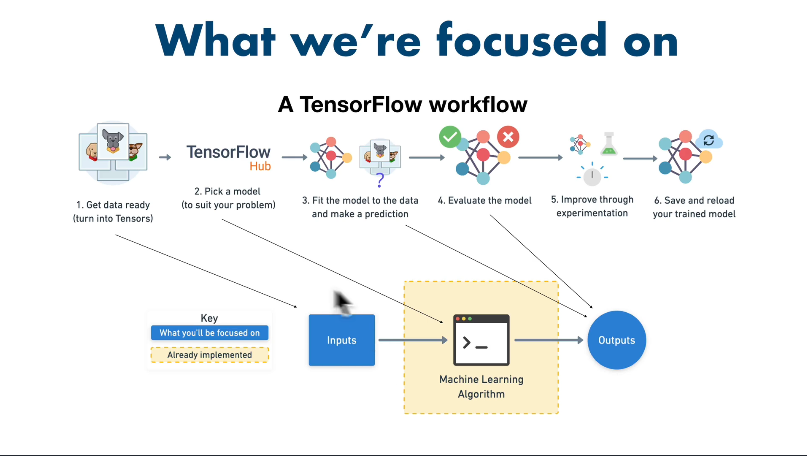

In [ ]:
# we focused only on input and outputs
Image('drive/MyDrive/ZTM/dog-vision/unstructured-data-important.png')

In [ ]:
# check the path
test_path = ('drive/MyDrive/ZTM/dog-vision/test/')
os.listdir(test_path)[:10]

['e379ba26a5e2e22e85975b839e0e401b.jpg',
 'e18a9e69da19fc1a19885d15b7f26e92.jpg',
 'e062ea256ada165dfe998fbc6529dff7.jpg',
 'deec27ba9446dfe31c0b32586f175d6a.jpg',
 'dcb9aeaf9f1a5c11e95509376d8788ca.jpg',
 'e292584f17fa7cea7f95bdadecde0ebb.jpg',
 'e46f65254fdf01d5fe732068c844efbd.jpg',
 'e7be7b911a4cba9fdfa4105ec4776370.jpg',
 'df92d68c07ec91b2f67cec77980e00cf.jpg',
 'e61cd2626c01dd00117eca55fb099f5d.jpg']

In [ ]:
# extract the file name
test_filenames = []
for fname in os.listdir(test_path):
  test_filenames.append(test_path + fname)
test_filenames[:10]

['drive/MyDrive/ZTM/dog-vision/test/e379ba26a5e2e22e85975b839e0e401b.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/e18a9e69da19fc1a19885d15b7f26e92.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/e062ea256ada165dfe998fbc6529dff7.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/deec27ba9446dfe31c0b32586f175d6a.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/dcb9aeaf9f1a5c11e95509376d8788ca.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/e292584f17fa7cea7f95bdadecde0ebb.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/e46f65254fdf01d5fe732068c844efbd.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/e7be7b911a4cba9fdfa4105ec4776370.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/df92d68c07ec91b2f67cec77980e00cf.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/e61cd2626c01dd00117eca55fb099f5d.jpg']

In [ ]:
# load test image file names
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

In [ ]:
test_filenames[:10]

['drive/MyDrive/ZTM/dog-vision/test/e379ba26a5e2e22e85975b839e0e401b.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/e18a9e69da19fc1a19885d15b7f26e92.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/e062ea256ada165dfe998fbc6529dff7.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/deec27ba9446dfe31c0b32586f175d6a.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/dcb9aeaf9f1a5c11e95509376d8788ca.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/e292584f17fa7cea7f95bdadecde0ebb.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/e46f65254fdf01d5fe732068c844efbd.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/e7be7b911a4cba9fdfa4105ec4776370.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/df92d68c07ec91b2f67cec77980e00cf.jpg',
 'drive/MyDrive/ZTM/dog-vision/test/e61cd2626c01dd00117eca55fb099f5d.jpg']

In [ ]:
# check the length of the data
len(test_filenames)

10357

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data = True)

Creating test data batches...


In [ ]:
# now is a batch
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on test data batch using on test data batch using the full model
# test_predictions = loaded_full_model.predict(test_data,
                                 # verbose = 1)

In [ ]:
# Make predictions on test data batch using on test data batch using the 1st model
# I dont have a GPU
test_predictions = model.predict(test_data,
                                 verbose = 1)

324/324 [==============================] - 880s 3s/step


In [ ]:
test_predictions[:10]

array([[2.83975442e-05, 9.30883471e-05, 1.74089655e-04, ...,
        1.20698660e-05, 4.83521726e-05, 5.26800541e-05],
       [1.51284068e-04, 7.25193880e-04, 2.44039635e-04, ...,
        2.37867993e-04, 7.11800749e-05, 4.23727615e-04],
       [1.15336239e-04, 1.62508455e-04, 7.71984342e-04, ...,
        1.81846772e-04, 2.92754936e-04, 1.61682969e-04],
       ...,
       [2.86071487e-02, 8.27334914e-03, 6.12757693e-04, ...,
        6.27419504e-05, 5.12860774e-04, 1.27117243e-03],
       [2.12436265e-04, 2.94993282e-03, 1.22069105e-05, ...,
        1.05185691e-05, 2.68970325e-06, 1.62286393e-04],
       [1.25938363e-03, 3.58332306e-01, 5.70710632e-04, ...,
        1.91910961e-03, 4.39888885e-04, 6.19749073e-04]], dtype=float32)

In [ ]:
# Save predictions (Numpy array) to csv file (for access later)
np.savetxt('drive/MyDrive/ZTM/dog-vision/preds_array.csv', test_predictions, delimiter = ',')

In [ ]:
# load predictions (Numpy array) from csv file
test_predictions = np.loadtxt('drive/MyDrive/ZTM/dog-vision/preds_array.csv', delimiter = ',')

In [ ]:
# this are prediction probabilities for the 10000 images
test_predictions[:10]

array([[2.83975442e-05, 9.30883471e-05, 1.74089655e-04, ...,
        1.20698660e-05, 4.83521726e-05, 5.26800541e-05],
       [1.51284068e-04, 7.25193880e-04, 2.44039635e-04, ...,
        2.37867993e-04, 7.11800749e-05, 4.23727615e-04],
       [1.15336239e-04, 1.62508455e-04, 7.71984342e-04, ...,
        1.81846772e-04, 2.92754936e-04, 1.61682969e-04],
       ...,
       [2.86071487e-02, 8.27334914e-03, 6.12757693e-04, ...,
        6.27419504e-05, 5.12860774e-04, 1.27117243e-03],
       [2.12436265e-04, 2.94993282e-03, 1.22069105e-05, ...,
        1.05185691e-05, 2.68970325e-06, 1.62286393e-04],
       [1.25938363e-03, 3.58332306e-01, 5.70710632e-04, ...,
        1.91910961e-03, 4.39888885e-04, 6.19749073e-04]])

In [ ]:
test_predictions.shape
# we have 10357 test images and each one of them have 120 probability

(10357, 120)

## Preparing test data set

Looking at the Kaggle sample submission, we find that it wants our model prediction probability outputs in a DataFrame with an ID and a columns for each different dog breed.

To get the data in this format, we'll:
* create a pandas DataFrame with Id column as well as a column for each dog breed.
* add data to the ID column by extracting the test image ID's fromtheir filepaths.
* Add data (the prediction probabilities) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it into Kaggle.

In [ ]:
# visualize the columns
['id'] + list(unique_breeds)

['id',
 'affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenen

In [ ]:
# create a pandas data frame
preds_df = pd.DataFrame(columns = ['id'] + list(unique_breeds))

In [ ]:
preds_df.head(10)

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
# append test image ID's to predictions Data Frame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df['id'] = test_ids

In [ ]:
preds_df.head()

id affenpinscher afghan_hound  \
0  e379ba26a5e2e22e85975b839e0e401b           NaN          NaN   
1  e18a9e69da19fc1a19885d15b7f26e92           NaN          NaN   
2  e062ea256ada165dfe998fbc6529dff7           NaN          NaN   
3  deec27ba9446dfe31c0b32586f175d6a           NaN          NaN   
4  dcb9aeaf9f1a5c11e95509376d8788ca           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [ ]:
# Add the predict probabilitites to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df

id  affenpinscher  afghan_hound  \
0      e379ba26a5e2e22e85975b839e0e401b       0.000028  9.308835e-05   
1      e18a9e69da19fc1a19885d15b7f26e92       0.000151  7.251939e-04   
2      e062ea256ada165dfe998fbc6529dff7       0.000115  1.625085e-04   
3      deec27ba9446dfe31c0b32586f175d6a       0.000064  4.508594e-04   
4      dcb9aeaf9f1a5c11e95509376d8788ca       0.000036  1.132831e-02   
...                                 ...            ...           ...   
10352  07b9276c1a3b39979d0f75027fb10dc6       0.000010  5.108650e-05   
10353  07165cea9be18c57a340345c02a3e885       0.000359  1.137738e-05   
10354  07ad1a0d014793de8c2e104b801c6cda       0.000928  3.440329e-04   
10355  07737ae303594890f1ba38b87399ba40       0.091861  1.611024e-03   
10356  08b34271d7d196d13bbeeea99504e099       0.000019  8.166325e-07   

       african_hunting_dog  airedale  american_staffordshire_terrier  \
0                 0.000174  0.000246                        0.000074   
1                 0.000244  0.000041                        0.007286   
2                 0.000772  0.000010                        0.000279   
3                 0.000011  0.000287                        0.000182   
4                 0.000107  0.294062                        0.000061   
...                    ...       ...                             ...   
10352             0.008061  0.000019                        0.000073   
10353             0.000011  0.000024                        0.790973   
10354             0.000123  0.390288                        0.002603   
10355             0.000035  0.002760                        0.000102   
10356             0.000041  0.000448                        0.000334   

       appenzeller  australian_terrier   basenji    basset  ...  toy_poodle  \
0         0.000090            0.000531  0.020986  0.000004  ...    0.000711   
1         0.000227            0.000046  0.000392  0.000027  ...    0.006141   
2         0.004536            0.000037  0.000067  0.000008  ...    0.000019   
3         0.005999            0.000008  0.000215  0.000090  ...    0.000740   
4         0.001161            0.000847  0.000021  0.000100  ...    0.001829   
...            ...                 ...       ...       ...  ...         ...   
10352     0.000082            0.000010  0.002735  0.000046  ...    0.000126   
10353     0.000174            0.000052  0.001628  0.000051  ...    0.001273   
10354     0.001204            0.009396  0.000252  0.000194  ...    0.000180   
10355     0.000422            0.002414  0.000144  0.001421  ...    0.048770   
10356     0.005797            0.000283  0.005296  0.000004  ...    0.000166   

       toy_terrier    vizsla  walker_hound  weimaraner  \
0         0.725195  0.000082      0.001454    0.000014   
1         0.000341  0.003199      0.002697    0.001806   
2         0.000251  0.000022      0.000043    0.000095   
3         0.000037  0.000146      0.000037    0.000015   
4         0.000032  0.001613      0.002032    0.000144   
...            ...       ...           ...         ...   
10352     0.000173  0.000092      0.000049    0.000039   
10353     0.000029  0.000126      0.000880    0.000072   
10354     0.000061  0.002846      0.000364    0.004041   
10355     0.000697  0.000782      0.000650    0.001409   
10356     0.000617  0.000070      0.000079    0.000022   

       welsh_springer_spaniel  west_highland_white_terrier   whippet  \
0                    0.000108                     0.000408  0.000012   
1                    0.000051                     0.000687  0.000238   
2                    0.000060                     0.000360  0.000182   
3                    0.000694                     0.000004  0.000054   
4                    0.000953                     0.000014  0.000062   
...                       ...                          ...       ...   
10352                0.000035                     0.000088  0.000114   
10353                0.000037                     0.002110  0.000204   
10354        

In [ ]:
# export to csv for submission to kaggle
preds_df.to_csv('drive/MyDrive/ZTM/dog-vision/first_model_predictions_submission_1_mobilenetV2.csv',
                index = False)

## Making Predictions On Our Images

This is anothe version on procesing our inputs and get some outputs.

To make predictions on custom images, we'll:
* Get the filepaths of our own images
* Turn the filepaths into data batches using 'create_data_batches()', And since our custom images won't have labels, we set the 'test_data' parameter to 'True'.
* Pass the custom iamge data to our model's predict() method.
* Convert the prediction output probabilitites to predictions labels
* Compare the predicted labels to custom images

In [ ]:
# Get custom images filepaths
custom_path = 'drive/MyDrive/ZTM/dog-vision/my-dog-photos/'
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
# check the paths
custom_image_paths

['drive/MyDrive/ZTM/dog-vision/my-dog-photos/boki.jpg',
 'drive/MyDrive/ZTM/dog-vision/my-dog-photos/otto2.jpg',
 'drive/MyDrive/ZTM/dog-vision/my-dog-photos/otto1.jpg']

In [ ]:
# turn custom images into batch dataset
custom_data = create_data_batches(custom_image_paths, test_data = True) # has no labels

Creating test data batches...


In [ ]:
# check custom data
custom_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# make some predictions with the 1st model
custom_preds = model.predict(custom_data)

1/1 [==============================] - 1s 1s/step


In [ ]:
# Make some predictions with the full model
# custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
# check the predictions
custom_preds

array([[3.19147570e-04, 5.66011854e-03, 1.70859660e-03, 6.36486337e-03,
        4.63853765e-04, 1.22726290e-02, 7.73061591e-04, 7.71345687e-04,
        5.30991201e-05, 1.07202691e-03, 3.22371889e-05, 2.57872939e-01,
        1.33627187e-02, 1.16594916e-03, 2.19726600e-04, 1.87967857e-03,
        2.47436779e-04, 5.47946915e-02, 1.86559060e-04, 1.82228221e-03,
        1.85322468e-04, 2.53086182e-04, 1.12283125e-03, 2.11756153e-04,
        7.51044415e-03, 1.63649020e-04, 1.59542433e-05, 9.59682046e-04,
        1.19419035e-03, 3.81696364e-03, 1.57301326e-03, 1.06263498e-03,
        1.25878328e-03, 7.27210892e-03, 1.71802018e-03, 6.75840070e-03,
        1.71555462e-03, 7.25655407e-02, 2.82758661e-03, 1.59591364e-04,
        6.83268532e-04, 1.21657935e-03, 5.44330105e-03, 9.76776006e-04,
        4.06287890e-03, 2.05511496e-05, 1.93457454e-02, 3.31454701e-03,
        3.22637177e-04, 1.98237896e-02, 1.34218276e-01, 1.56002265e-04,
        6.57871068e-02, 9.76039955e-05, 1.26608706e-03, 2.230341

In [ ]:
# you have 3 images with 120 probabilities each one
custom_preds.shape

(3, 120)

In [ ]:
# get custom image predictions labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['bernese_mountain_dog', 'great_pyrenees', 'kuvasz']

In [ ]:
# get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

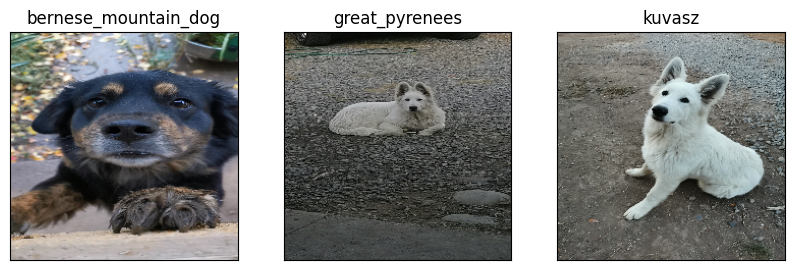

In [ ]:
# check custom image predictions
plt.figure(figsize = [10, 10])
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i + 1) # 1 row 3 columns and i + 1 the index
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)